In [1]:
import json
import dsl.v0_3.parser as parser
import os

In [70]:
# invalid_log_file = "models/logs/gens_20240514T153204/ae3edfdc_invalid.txt"
# invalid_log_file = "models/logs/gens_20240514T154230/a48eeaf7_invalid.txt"
# invalid_log_file = "models/logs/gens_20240514T155607/ddf7fa4f_invalid.txt"
invalid_log_file = "dsl/v0_3/generations/gpt4o_20240514/ddf7fa4f_invalid.txt"
with open(invalid_log_file, "r") as f:
    invalid_log = json.load(f)

In [71]:
for i, entry in enumerate(invalid_log):
    print(f"### ENTRY {i + 1}")
    code = json.loads(entry["response"])["code"]
    print(code)
    print(entry["error_type"])
    print(entry["error_message"])

### ENTRY 1
(do
    (rule
        (vars (this others))
        (filter
            (color_equals (color_of this) X)
        )
        (apply
            (update_color B)
        )
    )
    (rule
        (vars (this))
        (filter (and
            (color_equals (color_of X) neighbors))
        )
        (apply
            (update_color color_of neighbors)
        )
    )
)
parse_error
No terminal matches 's' in the current parser context, at line 3 col 26

        (vars (this others))
                         ^
Expected one of: 
	* RPAR

### ENTRY 2
(do
    (rule
        (vars (this))
        (filter
            (size_equals (size_of this) (max)))
        )
        (apply
            (update_color R)
        )
    )
)
parse_error
No terminal matches 'm' in the current parser context, at line 5 col 42

           (size_equals (size_of this) (max)))
                                        ^
Expected one of: 
	* SIZE_OF

### ENTRY 3
(do
    (rule
        (vars (this))
        (filter
 

In [32]:
# log_file = "models/logs/gens_20240515T145513/log.txt"
# log_file = "dsl/v0_3/generations/arga_gpt4o_20240515/log.txt"
# log_file = "models/logs/gens_20240516T190000_gpt4o_merged/log.txt"
log_file = "models/logs/gens_merged/log.txt"
with open(log_file, "r") as f:
    log = f.read()

log = log.splitlines()
log = [line for line in log if line.startswith("Valid")]
valid_count = [int(line.split(": ")[1]) for line in log]
# print(log)
print(len(valid_count))

# get stats of the valid counts
import numpy as np
valid_count = np.array(valid_count)
print(valid_count.mean())
print(valid_count.std())
print(valid_count.min())
print(valid_count.max())
print(np.percentile(valid_count, 15))
print(np.percentile(valid_count, 25))
print(np.percentile(valid_count, 50))
print(np.percentile(valid_count, 75))
print(np.percentile(valid_count, 90))
print(np.percentile(valid_count, 95))
print(np.percentile(valid_count, 99))



160
121.76875
14.28426663982089
100
150
106.0
108.75
119.0
134.0
142.0
146.04999999999998
149.41


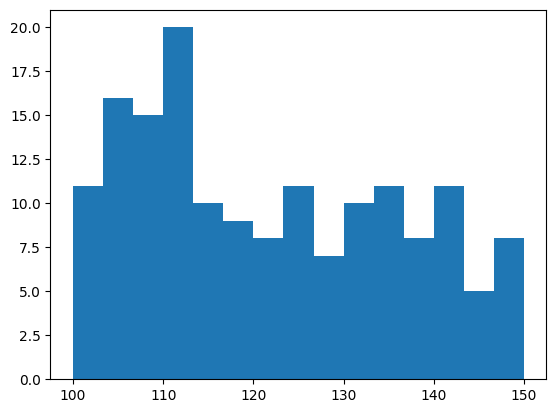

In [33]:
import matplotlib.pyplot as plt
plt.hist(valid_count, bins=15)
plt.show()


In [35]:
# log_file = "models/logs/gens_20240516T190000_gpt4o_merged/log.txt"
# log_file = "models/logs/gens_20240516T202600_gpt4o_merged/log.txt"
log_file = "models/logs/gens_merged/log.txt"
with open(log_file, "r") as f:
    log = f.read()

log = log.splitlines()[3:]
log = list(zip(*[iter(log)]*3))
def parse_entry(entry):
    task_id = entry[0].split(" ")[1]
    valid = int(entry[1].split(": ")[1])
    invalid = int(entry[2].split(": ")[1])
    return task_id, valid, invalid
log = [parse_entry(entry) for entry in log]
missing_valid = [entry for entry in log if entry[1] < 100]
for entry in missing_valid:
    print(entry[0])
    # print(entry)
# print(log)

# Verify all tasks have at least 100 valid sols

In [10]:
gens_dir = "dsl/v0_3/generations/arga_gpt4o_m100_20240516"

# list all *_valid_programs.txt files
valid_programs_files = [f for f in os.listdir(gens_dir) if f.endswith("_valid_programs.txt")]
# print(len(valid_programs_files))
print(f"Total valid programs: {len(valid_programs_files)}")
assert len(valid_programs_files) == 160
# valid_programs_files = valid_programs_files[:1]

dsl_parser = parser.Parser.new()

for lib_file in valid_programs_files:
    with open(os.path.join(gens_dir, lib_file), "r") as f:
        lib_file = f.read()
    lib_file = f"(\n{lib_file}\n)"
    lib = dsl_parser.lib_parse_tree(lib_file)
    programs = lib.children
    print(len(programs))
    assert len(programs) >= 100

Total valid programs: 160
125
125
133
134
138
130
110
101
119
141
134
134
111
103
132
143
105
128
141
113
110
122
114
134
100
150
105
121
115
111
142
111
106
101
123
146
101
103
118
107
111
112
138
103
115
148
130
104
108
125
125
128
119
129
108
136
134
122
114
119
112
119
106
129
149
105
105
142
125
140
141
106
117
113
139
111
113
106
108
125
106
148
131
115
147
146
111
117
128
142
115
105
125
123
130
145
104
107
109
135
108
102
107
133
136
114
107
127
139
103
125
145
134
125
117
107
105
107
112
107
145
137
113
101
105
133
109
108
132
125
116
114
101
150
105
113
120
147
139
137
134
118
107
116
140
112
133
113
143
126
142
135
113
120
137
129
105
121
149
112
